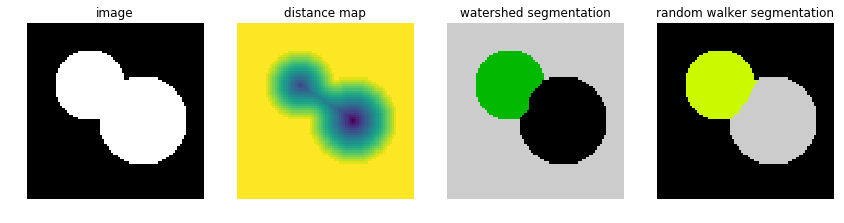

In [1]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(
    distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = measure.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=image)

markers[~image] = -1
labels_rw = random_walker(image, markers)

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('image')
plt.subplot(142)
plt.imshow(-distance, interpolation='nearest')
plt.axis('off')
plt.title('distance map')
plt.subplot(143)
plt.imshow(labels_ws, cmap='nipy_spectral_r', interpolation='nearest')
plt.axis('off')
plt.title('watershed segmentation')
plt.subplot(144)
plt.imshow(labels_rw, cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.title('random walker segmentation')

plt.tight_layout()
plt.show()

In [3]:
import scipy